In [ ]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import warnings
# warnings.filterwarnings(action='ignore')

# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
# font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
# plt.rc('font', family=font_name)

# fm.fontManager.addfont(path)


# 타이타닉 데이터 url로 불러오기

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
pd.read_csv(url)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 웹에서 읽어온 데이터를 df로 변환
- df.head(): 기본값 5

In [ ]:
df = pd.read_csv(url)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# 데이터의 컬럼별 정보 확인
- df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# 행과 열이 몇개인지 보여줌
- df.shape
    - 행, 열 순서로 나옴

In [ ]:
df.shape

(891, 15)

# 기술 통계 요약 보여주기
- df.describe()
- 숫자형 데이터만 보여줌

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 컬럼명 변경 예시 - 하나만 변경
- df.rename(columns={'embarked':'⭐️Port'})

In [ ]:
df_renamed = df.rename(columns={'embarked':'Port'})
df_renamed.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,Port,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# 컬럼명 변경 예시 - 여러개 변경 (객체 지정X: 원본 데이터는 그대로)
- 원본 데이터를 바꾸고싶을 경우: inplace=True

In [ ]:
df.rename(columns={'age':'Age', "sex":"Sex", "fare":"Fare"}, inplace=True)
df

,survived,pclass,Sex,Age,sibsp,parch,Fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 컬럼명 변경 예시 - 여러개 변경 (딕셔너리 사용)

In [ ]:
rename_dict = {
    'sibsp': 'Siblings',
    'parch': 'Parents&Children'
}

df.rename(columns=rename_dict, inplace=True)

In [ ]:
df.head()

,survived,pclass,Sex,Age,Siblings,Parents&Children,Fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# df 컬럼명 전체 보기
- df.columns

In [ ]:
df.columns

Index(['survived', 'pclass', 'Sex', 'Age', 'Siblings', 'Parents&Children',
       'Fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# 필요한거 위에서 보고 바꿈

# ex_dict = {

# }

# 자동 컬럼명 정리 예시
- 모든 커럼명을 소문자로 바꾸고, 공백은 밑줄로 변경

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

# 이건 안됨
# df.columns.lower()

# 이건 됨
# df.columns.str.lower()

# 숫자로 바꾸기
- to_numeric()

In [ ]:
df['survived'] = pd.to_numeric(df['survived'])
df['survived']


,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# 데이터 타입 변환
- astype()

In [ ]:
df["survived"] = df["survived"].astype("float")
df["survived"]

,survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


# 오류 발생기 NaN으로 처리하면서 숫자로 변환
- NaN: 결측치, 비어있는
- , errors='coerce' -> 숫자로 변환 불가능한 건 NaN으로 바꿔라!

In [ ]:
df["survived"] = pd.to_numeric(df["survived"], errors='coerce')

# 범주형 타입으로 변환 (메모리 절약 및 성능 향상)
- .astype()

In [ ]:
df["survived"] = df["survived"].astype("category")
df["survived"]

,survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


# 인덱스 설정 예시 - 새로운 인덱스 만들기

In [ ]:
df["Passenger_id"] = df.index + 1 # 인덱스는 0 부터 시작하기때문에 1, 2, 3 이런식으로 세기 위해서
df.set_index("Passenger_id", inplace=True)
df.head()

,survived,pclass,sex,age,siblings,parents&children,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1.0,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1.0,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0.0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 인덱스 - 기존 인덱스 활용
- drop= True 디폴트 / False: 인덱스로 쓰면서 컬럼명은 남겨놓음

In [ ]:
df.set_index("pclass", inplace=True, drop=False) # drop= True 디폴트 / False: 인덱스로 쓰면서 컬럼명은 남겨놓음
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,,
3,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 인덱스 삭제 위해 다시 객체 지정

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

In [ ]:
df["Passenger_id"] = df.index + 1 # 인덱스는 0 부터 시작하기때문에 1, 2, 3 이런식으로 세기 위해서
df.set_index("Passenger_id", inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 불린 인덱싱 정리
- 나이가 30이상인 데이터 선택
- 아래 코드로 하면 불린 값으로 age만 보이게 됨
- 전체 데이터를 같이 보고 싶으면 아래 코드와 같이 해야됨

In [ ]:
df['age'] >= 30

,age
Passenger_id,
1,False
2,True
3,False
4,True
5,True
...,...
887,False
888,False
889,False


### 나이가 30 이상인 전체 데이터 보기
- DataFrame으로 대괄호로 묶기

In [ ]:
df[df['age'] >= 30]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
880,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
882,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### 여성만 출력하기

In [ ]:
df[df['sex'] == 'female']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
9,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
883,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
886,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


### 실습
- 타이타닉 데이터에서 요금(fare)을 100 이상 지불한 승객 출력

In [ ]:
df[df['fare'] >= 100.0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
28,0,1,male,19.00,3,2,263.0000,S,First,man,True,C,Southampton,no,False
32,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
89,1,1,female,23.00,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
119,0,1,male,24.00,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
196,1,1,female,58.00,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
216,1,1,female,31.00,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
259,1,1,female,35.00,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,58.00,0,1,153.4625,S,First,woman,False,C,Southampton,yes,False
270,1,1,female,35.00,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True


### 불린 조건 여러개 주는 방법
- 조건은 소괄호로 구분
- 생존자 중에서 여성만 출력

In [ ]:
df[(df['survived'] == 1) & (df['sex'] == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
9,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
876,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
880,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


### 실습
- 타이타닉 데이터에서 embarked가 S이며, 요금은 100달러 이상 낸 남성을 출력

In [ ]:
df[(df['embarked'] == 'S') & (df['fare'] >= 100) & (df['sex'] == 'male')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
28,0,1,male,19.00,3,2,263.0000,S,First,man,True,C,Southampton,no,False
306,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
333,0,1,male,38.00,0,1,153.4625,S,First,man,True,C,Southampton,no,False
391,1,1,male,36.00,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
439,0,1,male,64.00,1,4,263.0000,S,First,man,True,C,Southampton,no,False
528,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True
661,1,1,male,50.00,2,0,133.6500,S,First,man,True,NaN,Southampton,yes,False
803,1,1,male,11.00,1,2,120.0000,S,First,child,False,B,Southampton,yes,False


### query함수()
- 바로 위 실습(타이타닉 데이터에서 embarked가 S이며, 요금은 100달러 이상 낸 남성을 출력)과 동일한 결과
- 조건을 문자로 나열하면 됨

In [ ]:
df.query('embarked == "S" and fare >= 100 and sex == "male"')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
28,0,1,male,19.00,3,2,263.0000,S,First,man,True,C,Southampton,no,False
306,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
333,0,1,male,38.00,0,1,153.4625,S,First,man,True,C,Southampton,no,False
391,1,1,male,36.00,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
439,0,1,male,64.00,1,4,263.0000,S,First,man,True,C,Southampton,no,False
528,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True
661,1,1,male,50.00,2,0,133.6500,S,First,man,True,NaN,Southampton,yes,False
803,1,1,male,11.00,1,2,120.0000,S,First,child,False,B,Southampton,yes,False


### map함수 이용해 딕셔너리 값 매핑

In [ ]:
df["who_short"] = df["who"].map({
    "man": "M",
    "woman": "W",
    "child": "C"
})
df

# 같은 코드
# who_dict = {
#     "man": "M",
#     "woman": "W",
#     "child": "C"
# }

# df["who_short"] = df["who"].map(who_dict)

# df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,who_short
Passenger_id,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,M
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,W
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,W
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,W
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,M
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,W
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,W


### map함수 이용해 적용
- 내가 만든 함수 이용하기

In [ ]:
def map_gender(who: str) -> str:
    if who == 'man': return 'M'
    elif who == 'woman': return 'W'
    elif who == 'child': return 'C'
    else: return 'UNKNOWN'

df['who_type'] = df['who'].map(map_gender)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,who_short,who_type
Passenger_id,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,M,M
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,W,W
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,W,W


## 실습
- 타이타닉 데이터에서 'fare'컬럼을 Series로 만들어보고 평균값 출력

In [ ]:
df['fare'].mean()

32.204207968574636

In [ ]:
# 인덱스 삭제 위해 다시 객체 지정
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# 인덱스 설정 예시 - 새로운 인덱스 설정
df["Passenger_id"] = df.index + 1 # 0이 아닌 1부터 승객 아이디 주기
df.set_index("Passenger_id", inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 실습 2

In [ ]:
# df[(df['age'] <= 20), (df['fare'].mean())]

under_20_fare = df[df['age'] <= 20]['fare']
under_20_fare_avg = under_20_fare.mean()
print(under_20_fare_avg)

29.853073743016758


### 실습 3

In [ ]:
a = df[(df['age'] >= 60) & (df['fare'] >= 30)]['age'].std()

6.071159226949526


In [ ]:
# 쿼리로 하기
df.query('age >= 60 and fare >= 30')['age'].std()

6.071159226949526

# 데이터 삭제 방법

### 열 삭제
- drop()

In [ ]:
df.drop(columns=['deck', 'embark_town']) # inplace 지정하면 원본 바뀜

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
Passenger_id,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False


### 열 삭제 추가
- iloc 문법
    - 데이터를 선택할때 쓰임
- loc 문법
    - 삭제할 데이터가 뜨문뜨문 있을경우

- drop 문법
    - df.drop(columns=[df.columns[0]])

### iloc

In [ ]:
# 인덱스 삭제 위해 다시 객체 지정
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# 인덱스 설정 예시 - 새로운 인덱스 설정
df["Passenger_id"] = df.index + 1 # 0이 아닌 1부터 승객 아이디 주기
df.set_index("Passenger_id", inplace=True)
df.head()

df = df.iloc[:, 1:] # 0번째 열 삭제하고 1번부터 나머지 전체 열 남겨라
df.head()
# df.drop(columns=[df.columns[0]])

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### loc
- 삭제할게 뜨문뜨문

In [ ]:
df = df.loc[:, ['alive', 'sex']]
df.head()

,alive,sex
Passenger_id,,
1,no,male
2,yes,female
3,yes,female
4,yes,female
5,no,male


### 행 삭제 ( 더 흔함 )

In [ ]:
# 인덱스 삭제 위해 다시 객체 지정
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# 인덱스 설정 예시 - 새로운 인덱스 설정
df["Passenger_id"] = df.index + 1 # 0이 아닌 1부터 승객 아이디 주기
df.set_index("Passenger_id", inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 행 삭제
df.drop(index=[1, 2], inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


### drop() axis

In [ ]:
df.drop('deck', axis=1) # axis=1 -> 열 방향


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
6,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
7,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False


### drop() axis
- 두개 이상의 열 삭제

In [ ]:
df.drop(['age', 'embarked'], axis=1) # axis=1 -> 열 방향

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,
3,1,3,female,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,1,0,53.1000,First,woman,False,C,Southampton,yes,False
5,0,3,male,0,0,8.0500,Third,man,True,NaN,Southampton,no,True
6,0,3,male,0,0,8.4583,Third,man,True,NaN,Queenstown,no,True
7,0,1,male,0,0,51.8625,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,Second,man,True,NaN,Southampton,no,True
888,1,1,female,0,0,30.0000,First,woman,False,B,Southampton,yes,True
889,0,3,female,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False


### drop() axis - 한 행만 삭제

In [ ]:
df.drop(5, axis=0) # axis=0 -> 행 방향

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


### drop() axis - 여러 행 삭제

In [ ]:
df.drop([3, 6, 880], axis=0) # axis=0 -> 행 방향

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


### 행 삭제 추가 - iloc 문법

In [ ]:
# df = df.drop(index=[8])
df = df.iloc[5:]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
11,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
12,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
14,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False


### 행 삭제 추가 - loc

In [ ]:
df = df.loc[df['embarked'] != 'S']
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
17,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
20,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
23,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True


### loc 이용해 행과 열 동시 선택

In [ ]:
df.loc[100:105, ['pclass', 'fare']] # [행, 원하는 열]

,pclass,fare
Passenger_id,,
100,2,26.0000
101,3,7.8958
102,3,7.8958
103,1,77.2875
104,3,8.6542
105,3,7.9250


### range()로 1부터 10까지 삭제 가능

In [ ]:
df.drop(index=list(range(1,10)))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Passenger_id,,,,,,,,,,,,,,,
10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
11,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
12,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
14,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


### 조건으로 인덱스 추출한 뒤 삭제
- 나이가 10살 미만인 승객들의 인덱스 추출 후 삭제
```python
drop_idx = df[df['age'] < 10].index
df.drop(index=drop_idx)
df.head()
```

### 데이터 내보내기
- csv로 저장

In [ ]:
# 드라이브 마운트 코드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# index=False -> 저장할때 번호를 또 붙임 방지
# csv로 저장
df.to_csv('/content/drive/MyDrive/코드잇/Pandas/DataFrame/titanic_cleaned.csv', index=False)

# Excel로 저장
df.to_excel('/content/drive/MyDrive/코드잇/Pandas/DataFrame/titanic_cleaned.xlsx', index=False)

# 데이터 분석 실습
### 1. 전처리 실습
### (1). 결측값 확인

In [ ]:
# 인덱스 삭제 위해 다시 객체 지정
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### (1) 결측값 확인

In [ ]:
# isnull()
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### 전체 결측치 비율 계산

In [ ]:
missing_ratio = df.isnull().mean().sort_values(ascending=False) # 비율이 큰 것 부터 내림차순 정렬
print(missing_ratio)

deck           0.772166
age            0.198653
embarked       0.002245
embark_town    0.002245
survived       0.000000
pclass         0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
dtype: float64


### 결측값 시각화 - 히트맵

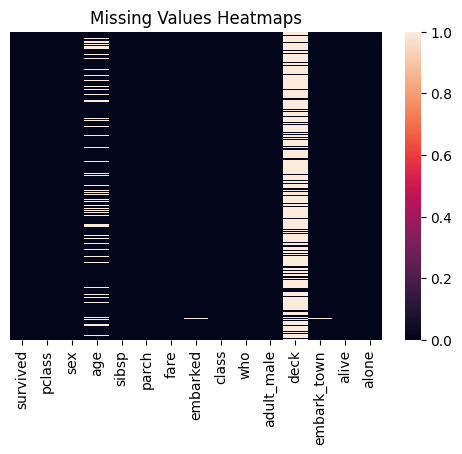

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Missing Values Heatmaps")
plt.show()

# 까만색 - 값이 있는것
# 밝은색 - 값이 없는것

### (2) 결측값 처리
- 결측값 넣는 함수 - fillna()
- 나이 결측값 평균으로 대체

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
# 결측값 재확인
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### embark_town 컬럼은 최빈값으로 교체
- mode()[0] -> 최빈값

In [ ]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# 결측값 재확인
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


### 결측값이 많은 컬럼 삭제(예: deck)

In [ ]:
df.drop(columns=['deck'], inplace=True)

# 결측값 재확인
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


### 모든 결측치 제거 - 행단위

In [ ]:
df.dropna(inplace=True)

# 결측값 재확인
print(df.isnull().sum())

# 확인
df.info()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        8

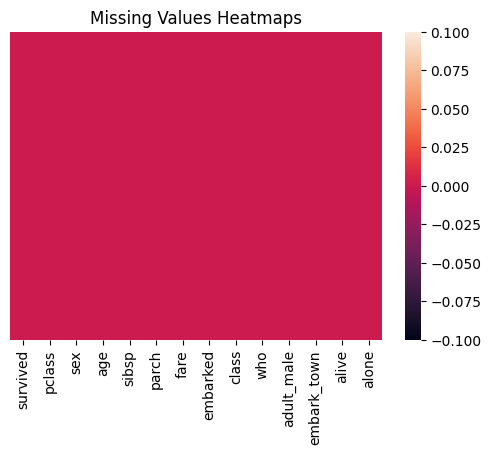

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Missing Values Heatmaps")
plt.show()

### 2.중복값 찾고 처리하기
### 중복된 행 전체 보기

In [ ]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,Southampton,no,True


### 중복행 찾기 - 갯수보기 => 일반적으로 가장 많이 사용

In [ ]:
print(df.duplicated().sum())

111


### 중복 제거

In [ ]:
df = df.drop_duplicates()

# 3. 이상치 찾고 처리하기
### 박스 플롯으로 시각화 - 1개만 그려보기

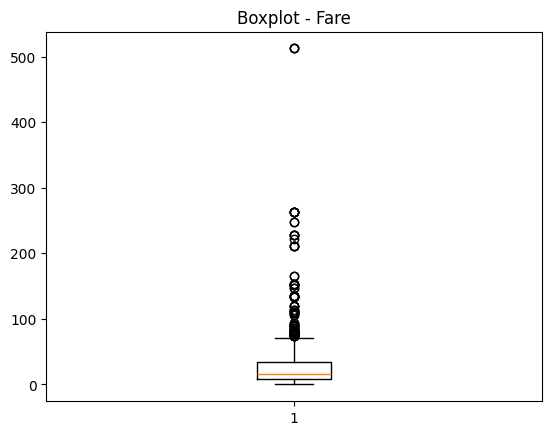

In [ ]:
plt.boxplot(df['fare'])
plt.title('Boxplot - Fare')
plt.show()

### 여러 변수로 박스플롯 그리기

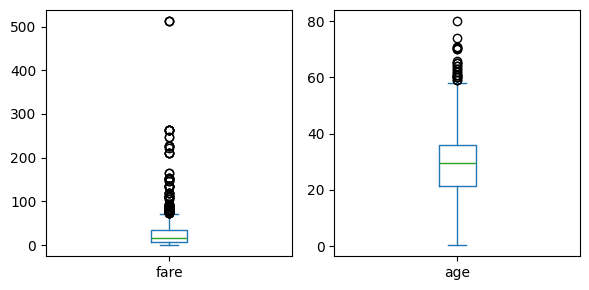

In [ ]:
variables = ['fare', 'age']
df[variables].plot(kind='box', subplots=True, layout=(1,2), figsize=(6, 3)) # , subplots=True : 각기 다른 박스
plt.tight_layout()
plt.show()

### 여러 변수 박스 플롯 한번에 그리기 - 수치형 변수만 가져오기
- select_dtypes(): 특정 타입의 변수를 선택한다

In [ ]:
numerict_cols = df.select_dtypes(include='number').columns
numerict_cols

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

### 개별 박스플롯을 for문으로 출력

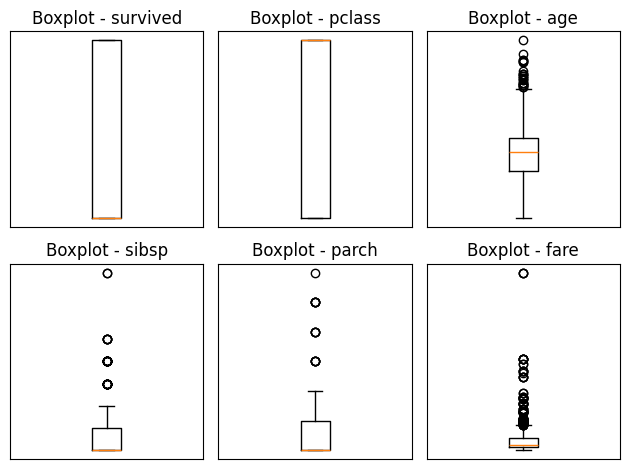

In [ ]:
selected_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

for idx, col in enumerate(selected_cols):
    plt.subplot(2, 3, idx + 1)
    plt.boxplot(df[col]) # dropna(): 데이터에 결측치가 있다면 빼줘
    plt.title(f'Boxplot - {col}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# IQR 방식으로 이상점 찾기 - fare

In [ ]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)

IQR = q3 - q1

### 이상점 조건 설정

In [ ]:
outliers = (df['fare'] < (q1 - 1.5 * IQR)) | (df['fare'] > (q3 + 1.5 * IQR))

### 이상점 개수 확인


In [ ]:
print("이상점 개수: ", outliers.sum())

이상점 개수:  100


In [ ]:
print(df[outliers]['fare'])

27     263.0000
31     146.5208
34      82.1708
52      76.7292
62      83.4750
         ...   
820     93.5000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: fare, Length: 100, dtype: float64


### 이상치 제거

In [ ]:
df_no_outliers = df[~outliers] # ~: 제외시킨다는 표현

# 문자열 관련

### 문자열 대소문자 처리

In [ ]:
# 소문자 처리
df['who_lower'] = df['who'].str.lower()

# 대문자 처리
df['who_upper'] = df['who'].str.upper()

# 맨앞 글자만 대문자
df['who_capitalized'] = df['who'].str.capitalize()

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,who_lower,who_upper,who_capitalized
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,man,MAN,Man
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,woman,WOMAN,Woman
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,woman,WOMAN,Woman
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,woman,WOMAN,Woman
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,man,MAN,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,woman,WOMAN,Woman
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,woman,WOMAN,Woman
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,woman,WOMAN,Woman
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,man,MAN,Man


# 펭귄 데이터로 실습 예시
**주요 열**
- species: 펭귄의 종 (Adelie, Chinstrap, Gentoo)
- island: 발견된 섬 (Biscoe, Dream, Torgersen)
- bill_length_mm: 부리 길이 (mm)
- bill_depth_mm: 부리 깊이 (mm)
- flipper_length_mm: 날개 길이 (mm)
- body_mass_g: 체중 (g)
- sex: 성별

In [ ]:
# 데이터 불러오기
penguins = sns.load_dataset("penguins")   # 씨본에서 데이터 불러오는 거 보여드리기
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 문자열 분리

In [ ]:
penguins['sex_code'] = penguins['sex'].str[0]

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,M
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,F
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,F
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,F
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,F
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,M
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,F


### 2. 불필요한 문자 제거

In [ ]:
# 일부러 불필요한 문자 만들기 코드 예시
penguins["comment"] = ["Fluffy!", "Smooth!", "Large.", "Tiny!!"] * (len(penguins) // 4)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,M,Fluffy!
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,F,Smooth!
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,F,Large.
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,F,Fluffy!


### 불필요한 문자 제거 - 느낌표와 마침표 제거

In [ ]:
penguins['comment_cleaned'] = penguins['comment'].str.replace('!', '', regex=False).str.replace('.', '', regex=False)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment,comment_cleaned
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,M,Fluffy!,Fluffy
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,F,Smooth!,Smooth
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,F,Large.,Large
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!,Tiny
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,F,Fluffy!,Fluffy


### 숫자 데이터 가공하기
- 날개의 크기 * 부리의 길이 => 펭귄의 몸통 면적을 추정

In [ ]:
penguins['body_area'] = penguins['flipper_length_mm'] * penguins['bill_length_mm']
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment,comment_cleaned,body_area
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,M,Fluffy!,Fluffy,7077.1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,F,Smooth!,Smooth,7347.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,F,Large.,Large,7858.5
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!,Tiny,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,F,Fluffy!,Fluffy,7083.1


### 정규화 (min-max Scaling)
- 수식 외워야됨 (수업자료 ppt에 있음)

In [ ]:
penguins['bill_length_mm'] = ((penguins['bill_length_mm'] - penguins['bill_length_mm'].min()) / (penguins['bill_length_mm'].max() - penguins['bill_length_mm'].min()))
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment,comment_cleaned,body_area
0,Adelie,Torgersen,0.254545,18.7,181.0,3750.0,Male,M,Fluffy!,Fluffy,7077.1
1,Adelie,Torgersen,0.269091,17.4,186.0,3800.0,Female,F,Smooth!,Smooth,7347.0
2,Adelie,Torgersen,0.298182,18.0,195.0,3250.0,Female,F,Large.,Large,7858.5
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!,Tiny,NaN
4,Adelie,Torgersen,0.167273,19.3,193.0,3450.0,Female,F,Fluffy!,Fluffy,7083.1


### 표준화 (Z-score Standardization)
- 평균: 0 , 표준편차: 1

In [ ]:
penguins["bill_depth_std"] = ((penguins["bill_depth_mm"] - penguins["bill_depth_mm"].mean()) / penguins["bill_depth_mm"].std())
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment,comment_cleaned,body_area,bill_depth_std
0,Adelie,Torgersen,0.254545,18.7,181.0,3750.0,Male,M,Fluffy!,Fluffy,7077.1,0.784300
1,Adelie,Torgersen,0.269091,17.4,186.0,3800.0,Female,F,Smooth!,Smooth,7347.0,0.126003
2,Adelie,Torgersen,0.298182,18.0,195.0,3250.0,Female,F,Large.,Large,7858.5,0.429833
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!,Tiny,NaN,NaN
4,Adelie,Torgersen,0.167273,19.3,193.0,3450.0,Female,F,Fluffy!,Fluffy,7083.1,1.088129


### cut() 함수 - 구간화
- 연속형 변수일 때 데이터의 구간을 범주로 나눔

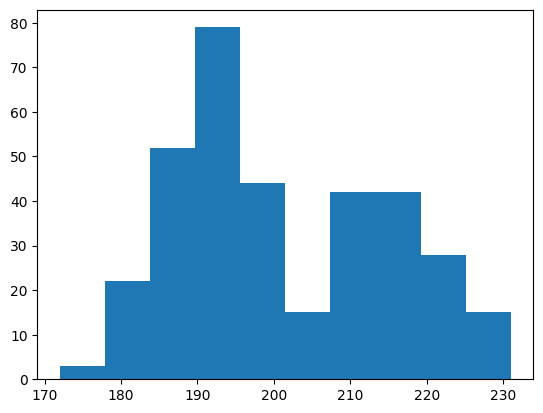

In [ ]:
plt.hist(penguins['flipper_length_mm'])
plt.show()

In [ ]:
# flipper_length_mm

labels = ['매우 짧음', '짧음', '보통', '김', '매우 김']
bins = [170, 185, 200, 215, 230, 245]

penguins['flipper_length_group'] = pd.cut(penguins['flipper_length_mm'], bins=bins, labels=labels)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment,comment_cleaned,body_area,bill_depth_std,flipper_length_group
0,Adelie,Torgersen,0.254545,18.7,181.0,3750.0,Male,M,Fluffy!,Fluffy,7077.1,0.784300,매우 짧음
1,Adelie,Torgersen,0.269091,17.4,186.0,3800.0,Female,F,Smooth!,Smooth,7347.0,0.126003,짧음
2,Adelie,Torgersen,0.298182,18.0,195.0,3250.0,Female,F,Large.,Large,7858.5,0.429833,짧음
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!,Tiny,NaN,NaN,NaN
4,Adelie,Torgersen,0.167273,19.3,193.0,3450.0,Female,F,Fluffy!,Fluffy,7083.1,1.088129,짧음


### apply() 함수
- 펭귄 종 이름을 약어로 만들기 (예: Gentoo -> GEN)

In [ ]:
def species_code(name: str) -> str:
    if " " in name: return name[0].upper() + name.split(" ")[1][0].upper() # 예시: Gentoo penguins 이런 데이터를 -> GP
    else: return name[:3].upper() # 공백이 없는 단어는 앞의 3글자 추출해서 대문자로 만들어라

penguins['species_code'] = penguins['species'].apply(species_code)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code,comment,comment_cleaned,body_area,bill_depth_std,flipper_length_group,species_code
0,Adelie,Torgersen,0.254545,18.7,181.0,3750.0,Male,M,Fluffy!,Fluffy,7077.1,0.784300,매우 짧음,ADE
1,Adelie,Torgersen,0.269091,17.4,186.0,3800.0,Female,F,Smooth!,Smooth,7347.0,0.126003,짧음,ADE
2,Adelie,Torgersen,0.298182,18.0,195.0,3250.0,Female,F,Large.,Large,7858.5,0.429833,짧음,ADE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Tiny!!,Tiny,NaN,NaN,NaN,ADE
4,Adelie,Torgersen,0.167273,19.3,193.0,3450.0,Female,F,Fluffy!,Fluffy,7083.1,1.088129,짧음,ADE


### 특정 열만 보기


In [ ]:
penguins[['comment', 'comment_cleaned', 'species', 'body_area']].head(3)

,comment,comment_cleaned,species,body_area
0,Fluffy!,Fluffy,Adelie,7077.1
1,Smooth!,Smooth,Adelie,7347.0
2,Large.,Large,Adelie,7858.5


### pivot()함수
- 데이터를 재구조화 할 때 사용하는 함수

In [ ]:
# 🍽 tips 데이터로 날짜, 결합, 그룹 분석 실습
# tips 데이터 불러오기
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 피벗테이블 - pivot()

In [ ]:
pivot_table = tips.pivot(index='day', columns='sex', values='tip')
pivot_table

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# 중복 확인
tips[tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


### 피벗테이블 - pivot_table()

In [ ]:
pivot_table = tips.pivot_table(index='day', columns='sex', values='tip', aggfunc='sum') # aggfunc - mean이 디폴트
pivot_table

<ipython-input-149-31328d4f64ba>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = tips.pivot_table(index='day', columns='sex', values='tip', aggfunc='sum') # aggfunc - mean이 디폴트


sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


### 날짜 데이터 추가 - date_range()
- 날짜 컬럼 만들고 요일 및 월 추출

In [ ]:
tips["date"] = pd.date_range(start="2025-01-01", periods = len(tips), freq='D') # 디폴트 D : 일별로 -> M : 달별로
tips['weekday'] = tips['date'].dt.day_name() # 요일별 추출
tips['month'] = tips['date'].dt.month        # 월 숫자 추출
tips.head()

,total_bill,tip,sex,smoker,day,time,size,date,weekday,month
0,16.99,1.01,Female,No,Sun,Dinner,2,2025-01-01,Wednesday,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2025-01-02,Thursday,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2025-01-03,Friday,1
3,23.68,3.31,Male,No,Sun,Dinner,2,2025-01-04,Saturday,1
4,24.59,3.61,Female,No,Sun,Dinner,4,2025-01-05,Sunday,1


### 그룹별 분석
- 요일별 팁 평균

In [ ]:
avg_tip_by_day = tips.groupby('weekday')['tip'].mean().sort_values(ascending=False)
avg_tip_by_day

,tip
weekday,
Friday,3.356000
Sunday,3.250857
Saturday,3.239714
Thursday,3.015714
Tuesday,2.758235
Wednesday,2.750286
Monday,2.610286


# 데이터 합치기
- concat
    - 같은 컬럼 구조의 DataFrame을 행 방향으로 이어붙일 때

- merge
    - 공통 컬럼 기준으로 병합 (SQL JOIN처럼)

- join
    - 인덱스를 기준으로 병합할 때 간편하게 이용 가능

In [ ]:
# 공통 샘플 데이터 생성
data1 = pd.DataFrame({
    "id": [1, 2, 3],
    "name": ["Alice", "Bob", "Charlie"]
})

data2 = pd.DataFrame({
    "id": [4, 5, 6],
    "name": ["David", "Ella", "Frank"]
})

data1

,id,name
0,1,Alice
1,2,Bob
2,3,Charlie


In [ ]:
data2

,id,name
0,4,David
1,5,Ella
2,6,Frank


### concat() - 같은 컬럼 구조의 데이터 붙이기

In [ ]:
combined = pd.concat([data1, data2], ignore_index=True)
combined

,id,name
0,1,Alice
1,2,Bob
2,3,Charlie
0,4,David
1,5,Ella
2,6,Frank


### merge() - 두 데이터 프레임의 공통 컬럼 기준 데이터 합치기

In [ ]:
# 일단 데이터 준비
left = pd.DataFrame({
    "id": [1, 2, 3],
    "score": [90, 85, 88]
})

right = pd.DataFrame({
    "id": [2, 3, 4],
    "grade": ["B", "A", "C"]
})

left

,id,score
0,1,90
1,2,85
2,3,88


In [ ]:
right

,id,grade
0,2,B
1,3,A
2,4,C


### 공통컬럼: id

In [ ]:
merged = pd.merge(left, right, on='id', how='outer') # how = inner가 디폴트
merged

,id,score,grade
0,1,90.0,NaN
1,2,85.0,B
2,3,88.0,A
3,4,NaN,C


### join(): 인덱스 기준 병합
- 컬럼명이 겹치지 않아도 됨
- merge보다 간단하게 인덱스끼리 결합 가능


In [ ]:
# 데이터 설정
left_indexed = left.set_index("id")  # 인덱스 만드는 함수
right_indexed = right.set_index("id")

In [ ]:
left_indexed

,score
id,
1,90
2,85
3,88


In [ ]:
right_indexed

,grade
id,
2,B
3,A
4,C


In [ ]:
joined = left_indexed.join(right_indexed, how='left')
joined

,score,grade
id,,
1,90,NaN
2,85,B
3,88,A
